In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
def func(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    result = 0
    rel = ( x - mu )/sig
    
    if rel < -1 * alphaL:
        result = AL * (BL - rel)**(-nL)
    elif (rel >= -1 * alphaL) and (rel <= alphaR):
        result = np.exp(-1 * rel**2 / 2)
    elif rel > alphaR:
        result = AR*(BR + rel)**(-nR)
        
    return result * N #/ (np.sqrt(2 * np.pi) * sig)

def vfunc(x, mu, sig):
    N = 1
    alphaL = 10
    alphaR = 1
    nL= 3
    nR= 3
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    result = np.zeros(np.size(x))
    
    rel = ( x - mu )/sig
    I1 = rel < -1 * alphaL
    I2 = (rel >= -1 * alphaL) * (rel <= alphaR)
    I3 = rel > alphaR
    result[I1] = AL * (BL - rel[I1])**(-nL)
    result[I2] = np.exp(-1 * rel[I2]**2 / 2)
    result[I3] = AR*(BR + rel[I3])**(-nR)
        
    return result * N #/ (np.sqrt(2 * np.pi) * sig)

10.159064728353176


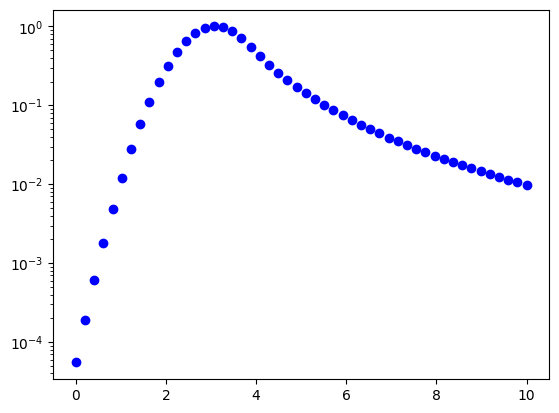

In [3]:
N = 1
mu = 3.1
sig = 0.70
alphaL = 10
alphaR = 1
nL= 3
nR= 3

x = np.linspace(0, 10, 50)
x_data = np.array(x)
#y_data = np.array([vfunc(j, N, mu, sig, alphaL, nL, alphaR, nR) for j in x_data])
#y_data = np.array(vfunc(x_data, N, mu, sig, alphaL, nL, alphaR, nR))
y_data = np.array(vfunc(x_data, mu, sig))
plt.plot(x, y_data, 'bo')
plt.yscale("log")

print(y_data.sum())

In [4]:
#print(len(x_data))
#print(len(y_data))

params, covs = curve_fit(vfunc, x_data, y_data) 
print("params: ", params)
print("covariance: \n", covs) 

params:  [3.1 0.7]
covariance: 
 [[0. 0.]
 [0. 0.]]
